# Task 4: Objective 

## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands

#### ANALYZING THE FOOD REVIEW DATA 

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib .pyplot as plt
import seaborn as sns 

In [12]:
df=pd.read_csv(r"D:\edu\INNO\NLP_CV\data\amazon_txt_review")
df.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [13]:
df.shape

(568454, 10)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   ReviewSummary           568427 non-null  object
 9   ReviewText              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [15]:
df.isnull().sum()

Unnamed: 0                 0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
ReviewSummary             27
ReviewText                 0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:

df.columns

Index(['Unnamed: 0', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText'],
      dtype='object')

#### CREATING DIFFRENT COLUMNS
- We are going to create  a unique rowid column which is serial number for row entries.
- A new text colmn that combines for summary and review
- Helpfulness column which contains the fraction of the helpfulness numerator/denominator.
- Helpfulness label column that divides the helpfulness fraction values into three segments.
- sentiment column that shows positive.negative or neutaral sentiments on basis of score. 

In [18]:
#converting the unnamed:0 column to RowId
df.columns=['RowId', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'ReviewSummary', 'ReviewText'] 

In [19]:
#assigning uniue row number
df["RowId"]=np.arange(1,df.shape[0]+1)

In [20]:
df.head()

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...


In [21]:
df.dtypes

RowId                      int32
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
ReviewSummary             object
ReviewText                object
dtype: object

In [22]:
df.describe() 

,RowId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284206.000000,1.743874,2.227876,4.183309,1.296261e+09
std,164086.266267,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142103.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284206.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426308.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568411.000000,866.000000,923.000000,5.000000,1.351210e+09


In [23]:
df.isnull().sum()

RowId                     0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
ReviewSummary             0
ReviewText                0
dtype: int64

In [24]:
#adding helpfulness fraction column
#helpfulness fraction=HelpfulnessNumerator/HelpfulnessDenominator
df["Helpfulness"]=df["HelpfulnessNumerator"]/df["HelpfulnessDenominator"]

In [25]:
df["Helpfulness"]

0         1.0
1         NaN
2         0.0
3         0.4
4         0.0
         ... 
568449    0.4
568450    0.4
568451    0.4
568452    0.4
568453    0.4
Name: Helpfulness, Length: 568411, dtype: float64

In [26]:
#replacing the nan in Helpfulness with zero as 0/0 is not defined that is why it is giving nan
df["Helpfulness"]=df["Helpfulness"].replace(np.nan,0)
df["Helpfulness"]

0         1.0
1         0.0
2         0.0
3         0.4
4         0.0
         ... 
568449    0.4
568450    0.4
568451    0.4
568452    0.4
568453    0.4
Name: Helpfulness, Length: 568411, dtype: float64

In [27]:
df.head() 

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0


In [28]:
#creating a function to label Helpfulness
def helpful(value):
    if value>0.5:
        return ">0.5"
    elif value<0.5 and value>0.25:
        return "<0.5"
    else:
        return "Useless"
    
#creating a function to label encode reviews on basis of score
 
def sentiment(score):
    if score>3:
        return "positive"
    elif score<3:
        return "negative"
    else:
        return "neutral"
    
    

In [29]:
from tqdm import tqdm, tqdm_notebook

In [30]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [31]:
#creating new column for label encoding the helpfuness column
df["HelpfulnessLabel"]=df["Helpfulness"].progress_apply(lambda x:helpful(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568411/568411 [00:01<00:00, 561508.45it/s]


In [32]:
#creating new column for score labels reflecting sentiment
df["Sentiment"]=df["Score"].progress_apply(lambda x:sentiment(x)) 

100%|██████████████████████████████████████████████████████████████████████| 568411/568411 [00:01<00:00, 540705.40it/s]


In [33]:
#creating new column which counts total number of words in review text column
df["WordCount"]=df["ReviewText"].progress_apply(lambda x:len(x.split()))
df["WordCount"] 

100%|███████████████████████████████████████████████████████████████████████| 568411/568411 [00:06<00:00, 92209.67it/s]


0          48
1          25
2          35
3          86
4         198
         ... 
568449     15
568450     15
568451    194
568452     44
568453     62
Name: WordCount, Length: 568411, dtype: int64

In [34]:
#creating a new column that contains both Review Summary and review text
df["Text"]=df["ReviewSummary"]+" " +df["ReviewText"] 

In [35]:
df.head() 

,RowId,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness,HelpfulnessLabel,Sentiment,WordCount,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,>0.5,positive,48,Good Quality Dog Food I have bought several of...
1,2,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,0.0,Useless,positive,25,Healthy Dog Food This is a very healthy dog fo...
2,3,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.0,Useless,negative,35,Bad I fed this to my Golden Retriever and he h...
3,4,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large ...",0.4,<0.5,negative,86,"Not hot, not habanero I have to admit, I was a..."
4,5,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and constip...,0.0,Useless,positive,198,The best weve tried so far We have a 7 week ol...


#### ANALYZING THE GIVEN DATA

In [36]:
#counting the number of users who have given reviews
print("The number of users are : ",len(df["UserId"].unique())) 

The number of users are :  256047


In [37]:
#counting the number of unique products for which the review is given 
print("The number of products are : ",len(df["ProductId"].unique()))   

The number of products are :  74258


#### DISTRIBUTION OF  SCORES AND SENTIMENT 

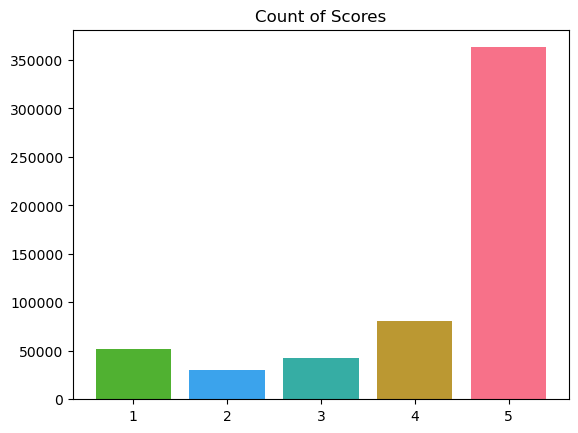

In [39]:
#countplot of scores
colors=sns.color_palette("husl")
plt.bar(data=df,height=df["Score"].value_counts(), x =df["Score"].value_counts().index,color=colors)
plt.title("Count of Scores")
plt.show() 

The figure shows the distribution of scores given by reviewers for food. The x-axis represents the scores, and the y-axis represents the count of reviews with that score.

Here are some observations from the figure:

* The most common score given by reviewers is 5, with over 350,000 reviews. This suggests that most reviewers are satisfied with the food they have reviewed.
* The second most common score is 4, with around 80,000 reviews. This indicates that a significant number of reviewers are somewhat satisfied with the food.
* The scores of 1, 2, and 3 are less common, with around 50,000, 30,000, and 50,000 reviews, respectively. This suggests that a smaller proportion of reviewers are dissatisfied with the food.




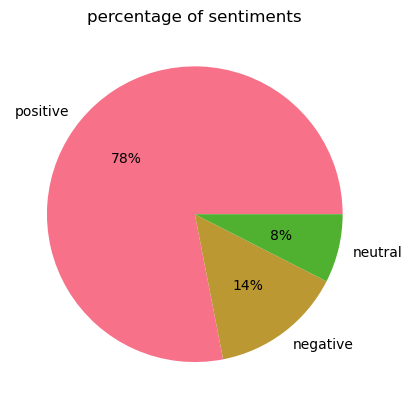

In [24]:
#countplot of sentiment
colors=sns.color_palette("husl")
plt.pie(df["Sentiment"].value_counts(), labels =df["Sentiment"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.title("percentage of sentiments")
plt.show()

The pie chart shows the distribution of sentiments , with the following breakdown:

* **Positive:** 78%
* **Negative:** 14%
* **Neutral:** 8%

This indicates that the majority of the sentiments expressed in the dataset are positive, with a smaller portion being negative and neutral.


In [25]:
len(df[df["Sentiment"]=="negative"])

82037

In [26]:
len(df[df["Sentiment"]=="positive"]) 

443777

#### ANALYZING THE COUNT OF WORDS FOR DIFFRENT SEGMENTS 

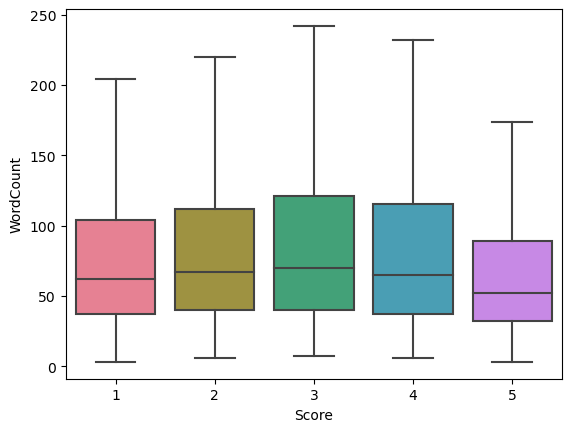

In [35]:
#word count distribution
sns.boxplot(data=df,x="Score",y="WordCount",showfliers=False,palette="husl") 
plt.show()  

The box plot visualizes the distribution of word counts in food reviews, categorized by their corresponding scores. Here's what we can infer from the plot:

**Overall Observations:**

* The word count distributions appear to be right-skewed for most scores, with longer word counts being more common. This suggests that reviewers tend to write more when they have stronger opinions, either positive or negative.
* There is a notable difference in word count distributions between the lower scores (1 and 2) and the higher scores (4 and 5). Reviews with lower scores tend to have shorter word counts, while reviews with higher scores have longer word counts.

**Specific Observations:**

* **Score 1:** The box plot indicates a relatively low range of word counts, with most reviews falling between 0 and 100 words. The median is around 50 words.
* **Score 2:** The box plot for score 2 shows a wider range of word counts compared to score 1, with the median around 75 words.
* **Score 3:** The box plot for score 3 exhibits a further increase in the range of word counts, with the median around 100 words.
* **Score 4:** The box plot for score 4 shows a similar distribution to score 3, with a wide range of word counts and a median around 100 words.
* **Score 5:** The box plot for score 5 has the widest range of word counts, with the median around 75 words.

**Potential Insights:**

* Reviewers who give lower scores (1 and 2) tend to write shorter reviews, possibly expressing their dissatisfaction with fewer words.
* Reviewers who give higher scores (4 and 5) tend to write longer reviews, potentially elaborating on their positive experiences.
* The median word count for scores 3 and 4 is similar, suggesting that reviewers with neutral to positive opinions might write reviews of similar lengths.



In [31]:
#getting the average word count
df.groupby("Score")["WordCount"].mean().to_frame()

,WordCount
Score,
1,87.323697
2,90.040881
3,95.645755
4,91.393156
5,74.167305


In [32]:
#getting the median word count
df.groupby("Score")["WordCount"].median().to_frame() 

,WordCount
Score,
1,62.0
2,67.0
3,70.0
4,65.0
5,52.0


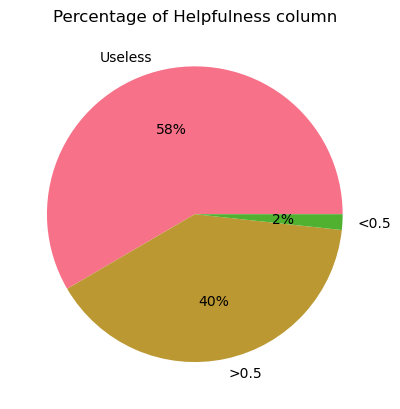

In [40]:
#helpfulness count
colors=sns.color_palette("husl")
plt.pie(df["HelpfulnessLabel"].value_counts(), labels =df["HelpfulnessLabel"].value_counts().index,colors=colors,autopct='%.0f%%')
plt.title("Percentage of Helpfulness column")
plt.show() 

The pie chart shows the distribution of helpfulness ratings in a dataset, with the following breakdown:

* **Useless:** 58%
* **< 0.5:** 2%
* **> 0.5:** 40%

This indicates that the majority of the reviews are considered "Useless," with a smaller portion being rated as "less than 0.5" helpful and "more than 0.5" helpful.


<Axes: xlabel='HelpfulnessLabel', ylabel='count'>

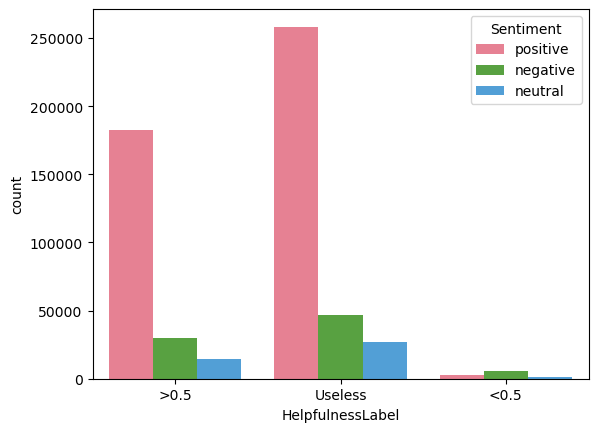

In [40]:
#helpfulness wrt o sentiment 
sns.countplot(data=df,x="HelpfulnessLabel",hue="Sentiment",palette="husl") 

This plot shows how the helpfulness of reviews (grouped into `>0.5`, `Useless`, and `<0.5` categories) correlates with the sentiment of the review (`positive`, `negative`, and `neutral`). Here's a breakdown:

1. **Helpfulness Label Categories:**
   - **`>0.5`:** Reviews considered more helpful (likely with a higher helpfulness score).
   - **`Useless`:** Reviews that were labeled as unhelpful.
   - **`<0.5`:** Reviews considered somewhat helpful but below the threshold of 0.5.

2. **Sentiment Analysis:**
   - **Positive Sentiment (red):** The majority of reviews fall under positive sentiment across all helpfulness categories. Notably, there are significantly more positive reviews in the `>0.5` and `Useless` categories.
   - **Negative Sentiment (green):** Negative reviews are less frequent overall but are more concentrated in the `Useless` and `>0.5` categories. This could suggest that both helpful and unhelpful reviews include negative feedback.
   - **Neutral Sentiment (blue):** Neutral reviews have the lowest count and are relatively evenly distributed, with a slight emphasis in the `Useless` category.

### Insights:
- Positive reviews dominate across all helpfulness categories.
- Negative reviews are particularly prevalent in the `Useless` and `>0.5` categories, suggesting polarizing opinions are either deemed helpful or unhelpful.
- Neutral reviews tend to have less influence and are fewer in number.


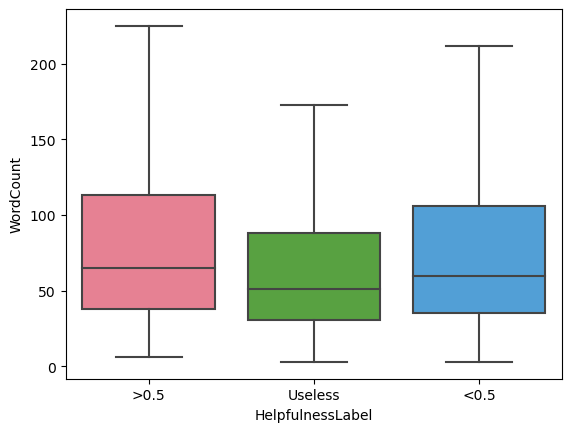

In [36]:
#getting word count for helpfulness reviews
sns.boxplot(data=df,x="HelpfulnessLabel",y="WordCount",showfliers=False,palette="husl")
plt.show() 

This box plot illustrates the distribution of `WordCount` for reviews grouped by `HelpfulnessLabel` (`>0.5`, `Useless`, `<0.5`).

### Observations:
1. **`>0.5` (pink):**
   - The median word count is relatively high.
   - There is a wider range of word counts compared to the other categories, suggesting that helpful reviews are more likely to be longer.

2. **`Useless` (green):**
   - The median word count is lower than in the other categories.
   - The interquartile range (IQR) is smaller, indicating that unhelpful reviews tend to be shorter and more consistent in length.

3. **`<0.5` (blue):**
   - The median word count is moderate, slightly lower than `>0.5`.
   - The overall range of word counts is comparable to `>0.5`, but the distribution is less spread out than helpful reviews.

### Insights:
- Reviews categorized as helpful (`>0.5`) tend to be longer, which aligns with the idea that detailed feedback is often seen as more useful.
- Useless reviews are typically shorter, potentially due to lack of detail or context.
- Reviews with `HelpfulnessLabel < 0.5` are somewhat in-between but closer to helpful reviews in word count.



#### MAKING WORDCLOUD 

In [44]:
#!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/152.1 kB ? eta -:--:--
     ---------                             41.0/152.1 kB 653.6 kB/s eta 0:00:01
     -------------------                   81.9/152.1 kB 762.6 kB/s eta 0:00:01
     ----------------------                92.2/152.1 kB 655.4 kB/s eta 0:00:01
     ----------------------                92.2/152.1 kB 655.4 kB/s eta 0:00:01
     ------------------------------------ 152.1/152.1 kB 647.7 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:

from wordcloud import WordCloud

In [25]:
import nltk
from nltk.corpus import stopwords 

In [26]:
#creating a dataframe for positive sentiments
df_positive=df.loc[df["Sentiment"]=="positive",:]

#joining the positive sentences 
words=" ".join(df_positive["Text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["love","like","great","taste","recommend","really","good","best","product","make","happy","favourite","perfect"]]) 

In [27]:
positive_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 

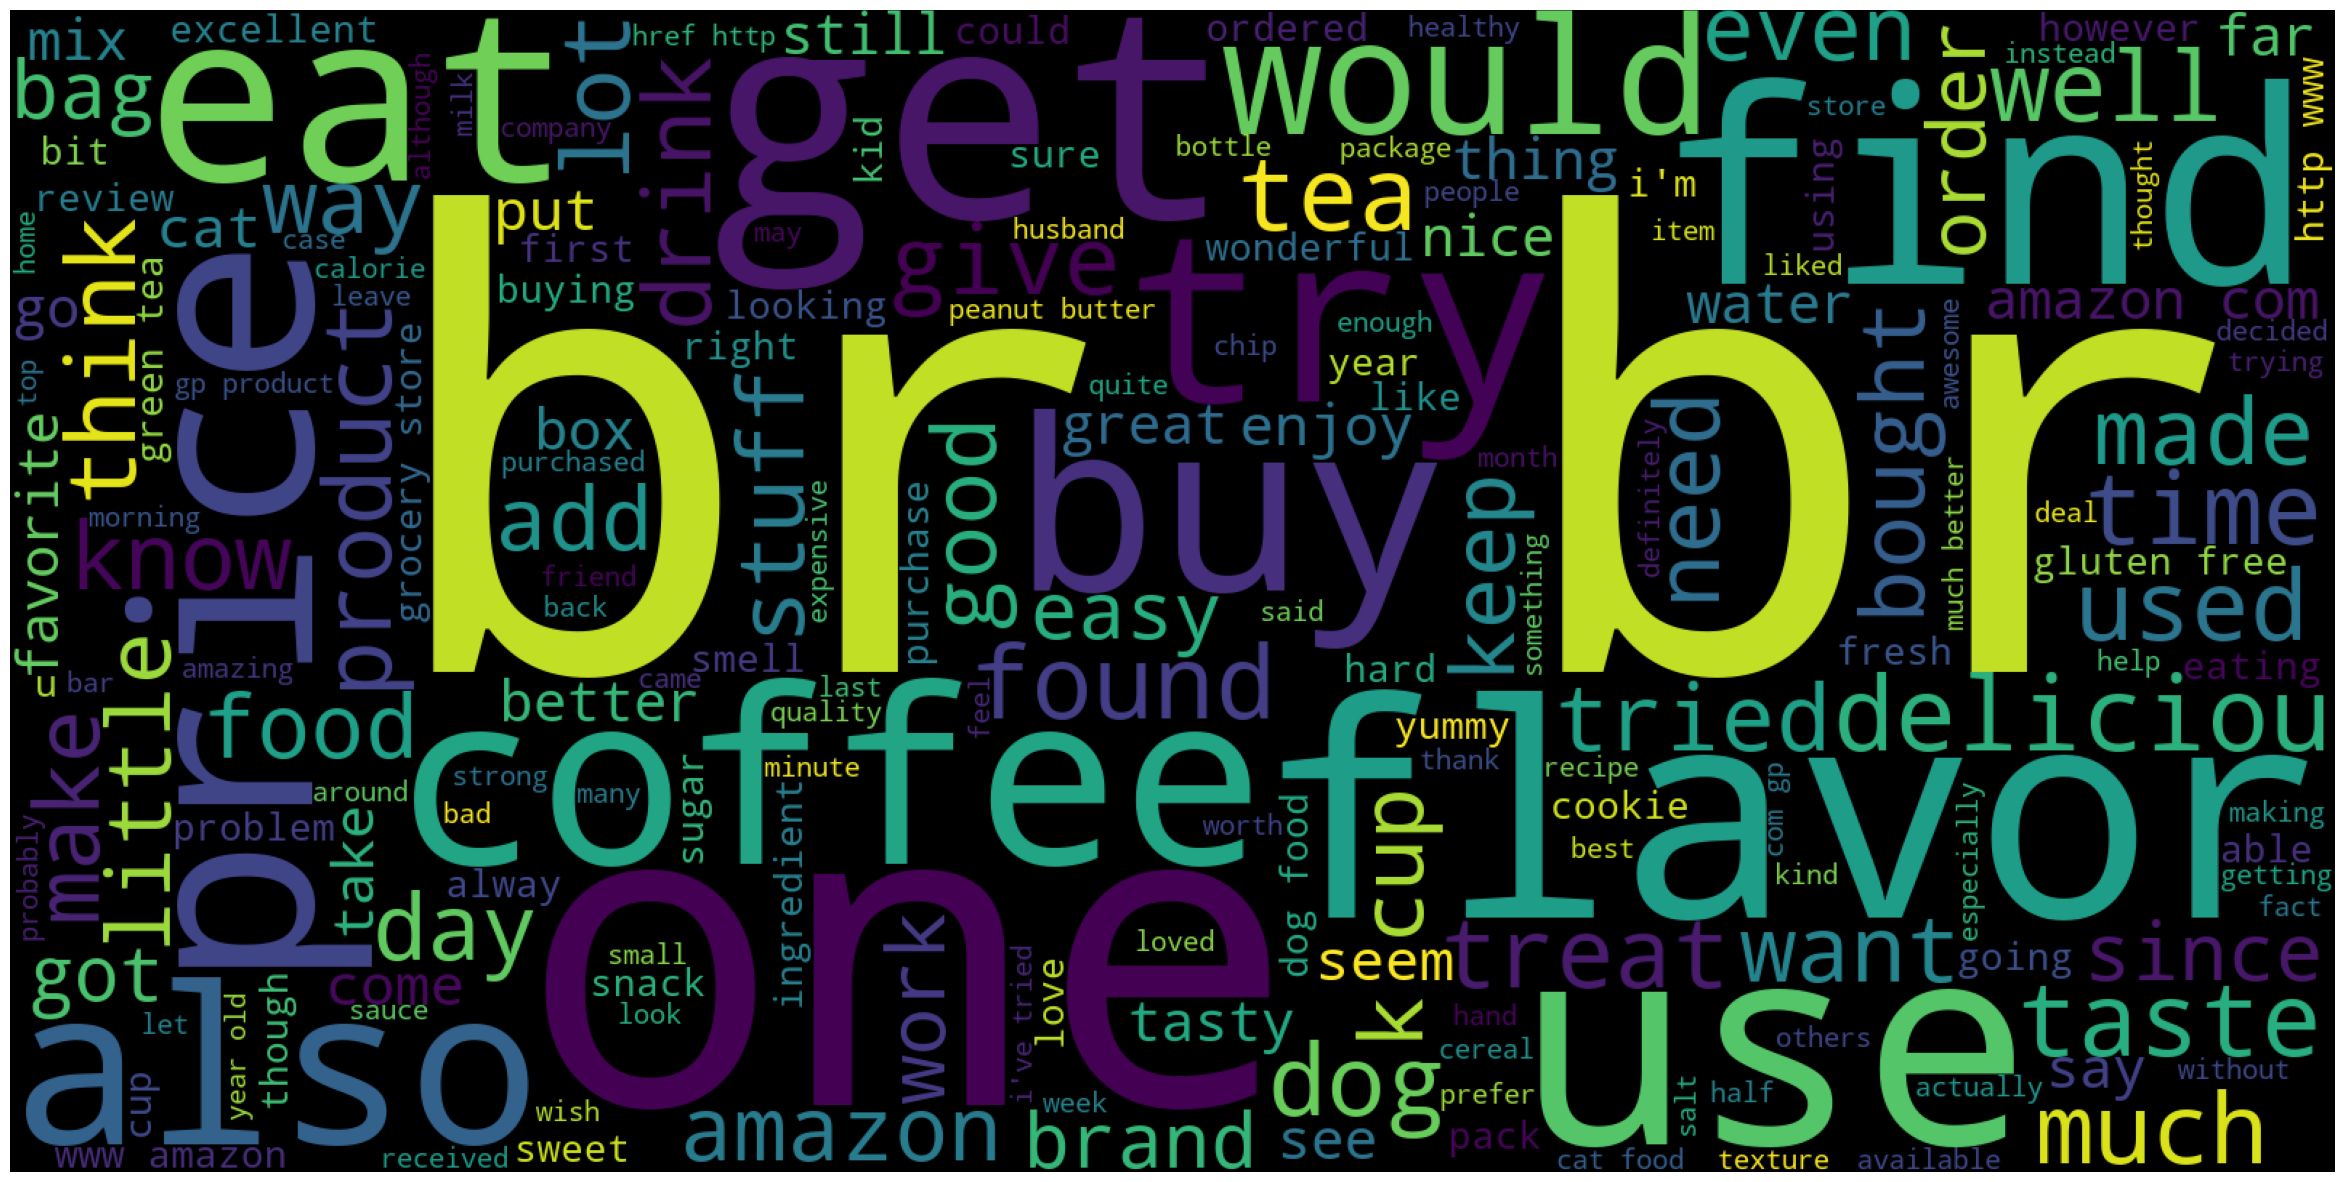

In [28]:
plt.figure(1,figsize=(30,20))
plt.imshow(positive_wordcloud)
plt.axis('off')
plt.show()

This word cloud represents the most frequent words in positive reviews. Larger words appear more often in the text, highlighting common themes in the feedback.

### Key Observations:
1. **Dominant Words:**
   - Words like **"buy," "eat," "flavor," "try,"** and **"find"** appear prominently, reflecting common positive sentiments about purchasing, consuming, and appreciating the product's taste or usefulness.
   - Words like **"coffee," "tea," "food,"** and **"snack"** suggest the reviews may be centered around consumable items.

2. **Positive Sentiment:**
   - Words such as **"delicious," "enjoy," "great," "better,"** and **"yummy"** highlight satisfaction and praise for the product.
   - Phrases like **"easy," "nice," "good,"** and **"tasty"** reinforce positive user experiences.

3. **Action-Oriented Words:**
   - Verbs like **"use," "make," "add," "keep,"** and **"work"** show how customers interact with the product, indicating practical uses or recommendations.

### Potential Insights:
- **Customer Preferences:** The prominence of words like **"flavor"** and **"taste"** suggests that these aspects are significant in positive reviews.
- **Actionable Feedback:** Words such as **"buy"** and **"try"** imply recommendations, indicating strong customer satisfaction.
- **Product Categories:** Words such as **"coffee"** and **"tea"** can indicate the most popular products being reviewed.


In [55]:
#creating a dataframe for negative sentiments
df_negative=df.loc[df["Sentiment"]=="negative",:]

#joining the negative sentences 
words=" ".join(df_negative["Text"]).lower()

#cleaned words

cleaned_words=" ".join([word for word in words.split() if word not in ["hate","bad","worst","taste","recommend","really"]]) 

In [56]:
negative_wordcloud = WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_words) 

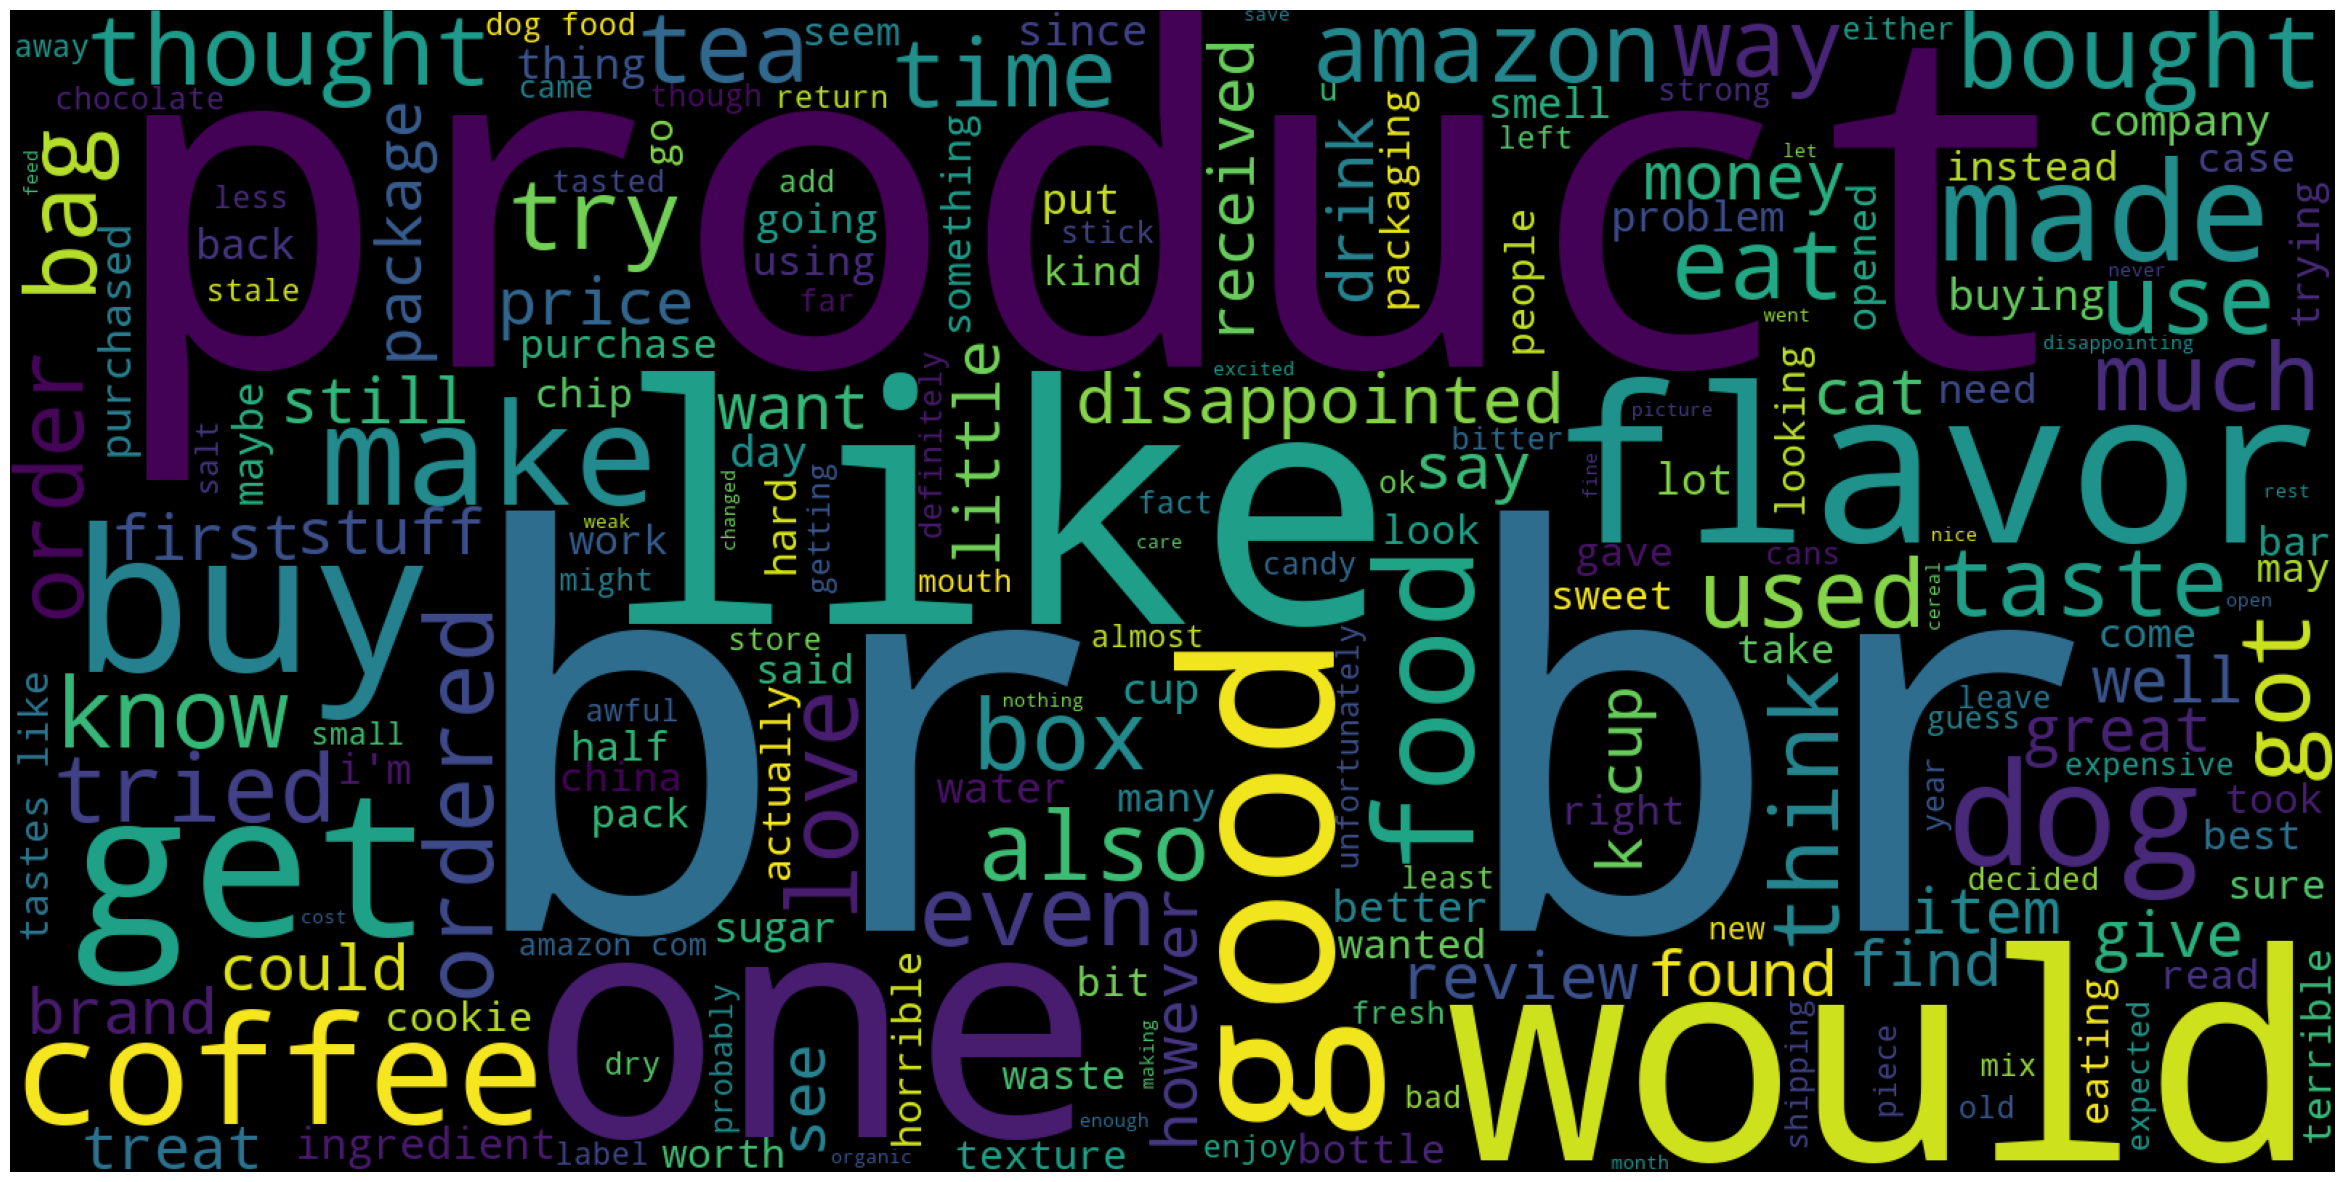

In [57]:
plt.figure(1,figsize=(30,20))
plt.imshow(negative_wordcloud)
plt.axis('off')
plt.show()

The word cloud you provided is a visual representation of the most frequent words used in negative reviews. Here are some observations based on the prominent words:

**Common Themes:**

* **Taste and Flavor:** Words like "taste," "flavor," "bitter," "awful," and "terrible" are prominent, suggesting that many negative reviews are centered around the taste or flavor of the product.
* **Quality and Condition:** Words like "stale," "bad," "horrible," and "waste" indicate concerns about the product's quality or condition upon receipt.
* **Packaging and Shipping:** Words like "package," "shipping," "broken," and "damaged" suggest issues with the product's packaging or the shipping process.
* **Customer Service and Company:** Words like "company," "customer service," and "return" point to dissatisfaction with the company's customer service or return policies.

**Other Notable Words and Phrases:**

* "Dog food" and "cat food" suggest that some of the negative reviews are related to pet food products.
* "Coffee" and "tea" indicate that the reviews might be about beverages.
* "Sugar" and "sweet" could be related to food or beverages with excessive sweetness.

**Overall, the word cloud highlights common complaints about taste, quality, packaging, and customer service in negative reviews.**



### INSIGHTS

- **The number of users who have given reviews are 256047.It means many people have given more than one review.**  
- **The number of unique products are 74,258 shows that many reviews are for same product.**  
- **Score 5 is dominating the score distribution having more than 350000 count.Least count is of score 2 having countaround 40000** 
- **78% of the reviews are having positive sentiment,14% are having negative sentiment while 8% are having neutral sentiment.** 
- **Reviews with score 3 have highest wordcount average as well as median.Score 5 have the least wordcount average and median.It shows that people giving very positive reviews are using less words to express their sentiment.**  
- **58% of reviews have helpfulness less than 25% while 40% of the reviews are having helpfulness greater than 50%.**  
- **Reviews which have helpfulness greater than 50% are hiaving the highest wordcount.It means that more lengthy reviews are more helpful**

### INSIGHTS ON THE BASIS OF WORDCLOUD 

- **From the positive sentiments word cloud we can see that green tea,peanut butter,cereal,snacks,bottled products,sweet are some of the popular products that have recieved positive reviews.**
- **Packaging of products have been appreciated it seems as well as we can see the popularity of the gluten free products.**   
- **For the negative reviews coffee,treat,drink are some of the products as well as the price of the products can aslo be seen as an issue.The smell and texture of food products have also been mentioned in the negative reviews.** 
- **While  catfood,dogfood,cookie,tea have both positive and negative reviews.** 
